In [6]:
# Import
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils.np_utils import to_categorical 
from sklearn.model_selection import train_test_split

In [8]:
# Load data
train = pd.read_csv('Dataset/digit-recognizer/train.csv')
test = pd.read_csv('Dataset/digit-recognizer/test.csv')
subs =  pd.read_csv('Dataset/digit-recognizer/sample_submission.csv')

In [10]:
# Find null-values
print('Null values in train data: ' + str(train.isnull().any().sum()))
print('Null values in test data: ' + str(test.isnull().any().sum()))

Null values in train data: 0
Null values in test data: 0


In [11]:
# Split data for train and prediction datasets
X = train.drop('label', axis=1).values
y = train.label.values
X_pred = test.values
X = X / 255
X_pred = X_pred / 255

In [15]:
X.shape

(42000, 784)

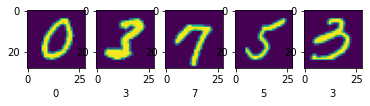

In [16]:
# Show 5 random samples from train data
nn = 5
for i, num in enumerate([random.randint(1, X.shape[0]) for _ in range(nn)]):
    plt.subplot(1, nn, i+1)
    plt.xlabel(y[num])
    plt.imshow(X[num].reshape(28, 28))

In [17]:
# Data shape
print(X.shape)
print(y.shape)
print(X_pred.shape)

(42000, 784)
(42000,)
(28000, 784)


In [18]:
# Convert data
X = X.reshape([42000,28,28,1])
y = y.reshape([42000,1])
X_pred = X_pred.reshape([28000,28,28,1])
y = to_categorical(y, num_classes = 10)

In [21]:
# Split X and y data for train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [22]:
# Make model
model = tf.keras.Sequential([])
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2)),
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3211520   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [23]:
# Complile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy']
             )

In [24]:
# Fit model
model.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=10)

Epoch 1/10
1182/1182 [==============================] - 210s 74ms/step - loss: 0.4152 - accuracy: 0.8689 - val_loss: 0.0871 - val_accuracy: 0.9712
Epoch 2/10
1182/1182 [==============================] - 77s 65ms/step - loss: 0.0976 - accuracy: 0.9703 - val_loss: 0.0607 - val_accuracy: 0.9814
Epoch 3/10
1182/1182 [==============================] - 74s 62ms/step - loss: 0.0722 - accuracy: 0.9779 - val_loss: 0.0592 - val_accuracy: 0.9802
Epoch 4/10
1182/1182 [==============================] - 74s 63ms/step - loss: 0.0538 - accuracy: 0.9840 - val_loss: 0.0444 - val_accuracy: 0.9857
Epoch 5/10
1182/1182 [==============================] - 75s 63ms/step - loss: 0.0433 - accuracy: 0.9858 - val_loss: 0.0487 - val_accuracy: 0.9838
Epoch 6/10
1182/1182 [==============================] - 75s 64ms/step - loss: 0.0396 - accuracy: 0.9872 - val_loss: 0.0468 - val_accuracy: 0.9864
Epoch 7/10
1182/1182 [==============================] - 75s 64ms/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.0454 

In [25]:
# Evaluation
model.evaluate(X_test,y_test)

132/132 [==============================] - 3s 23ms/step - loss: 0.0444 - accuracy: 0.9879


[0.044408220797777176, 0.9878571629524231]

In [26]:
# Predict data
predictions = model.predict(X_pred)
y_pred = np.argmax(predictions, axis=1)

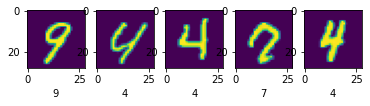

In [27]:
# Show 5 random prediction
nn = 5
for i, num in enumerate([random.randint(1, X_pred.shape[0]) for _ in range(nn)]):
    plt.subplot(1, nn, i+1)
    plt.xlabel(y_pred[num])
    plt.imshow(X_pred[num].reshape(28, 28))

In [28]:
# Save data
subs['Label'] = pd.DataFrame(y_pred)
subs.to_csv('./DRSubmissions.csv', index = False)